## Задание
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.  
Постройте графики количества итераций оптимизации функции ackley от значения параметра.  



In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import optuna

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
result_1 = differential_evolution(ackley, bounds, strategy='best1bin',
                                popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
result_1

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
result_2 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                popsize=25, tol=0.02, mutation=(1.5, 1.9), recombination=0.5, seed=42, updating='deferred')
result_2

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 38713
     nit: 772
 success: True
       x: array([0., 0.])

In [5]:
result_3 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                  popsize=10, tol=0.005, mutation=(0.5, 1.5), recombination=0.3, seed=42, updating='immediate')
result_3

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 10043
     nit: 498
 success: True
       x: array([0., 0.])

In [6]:
result_4 = differential_evolution(ackley, bounds, strategy='randtobest1exp', 
                                    popsize=15, tol=0.005, mutation=(0.1, 0.7), recombination=1.5, seed=42, updating='deferred')
result_4

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2883
     nit: 93
 success: True
       x: array([0., 0.])

In [7]:
result_5 = differential_evolution(ackley, bounds, strategy='randtobest1exp', 
                               popsize=20, tol=0.005, mutation=(0.1, 0.5), recombination=2, seed=42, updating='deferred')
result_5

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 83
 success: True
       x: array([0., 0.])

In [8]:
result_6 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                popsize=20, tol=0.005, mutation=(0.1, 0.3), recombination=2, seed=42, updating='deferred')
result_6

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3703
     nit: 90
 success: True
       x: array([0., 0.])

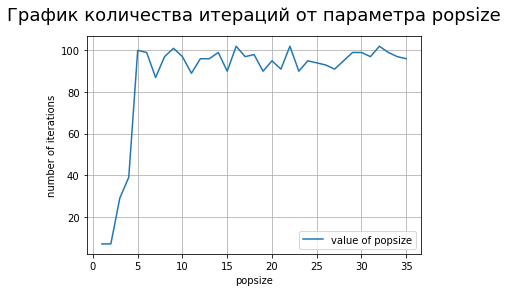

In [9]:
list_count_nit = []
popsize = [x for x in range(1, 36)]

for n in range(1, 36):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin',
                          popsize=n, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)
    
plt.title('График количества итераций от параметра popsize', fontdict={'fontsize':18}, pad=16)
plt.plot(popsize, list_count_nit, label = 'value of popsize' )
plt.grid(True)
plt.xlabel("popsize")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

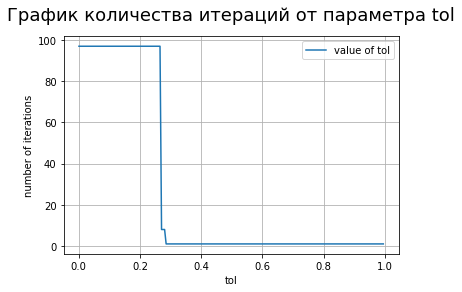

In [10]:
list_count_nit = []
tol = [x for x in np.arange(0.0005, 1.0, 0.005)]

for n in np.arange(0.0005, 1.0, 0.005):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin',
       popsize=10, tol=n, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)

plt.title('График количества итераций от параметра tol', fontdict={'fontsize':18}, pad=16)
plt.plot(tol, list_count_nit, label = 'value of tol' )
plt.grid(True)
plt.xlabel("tol")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

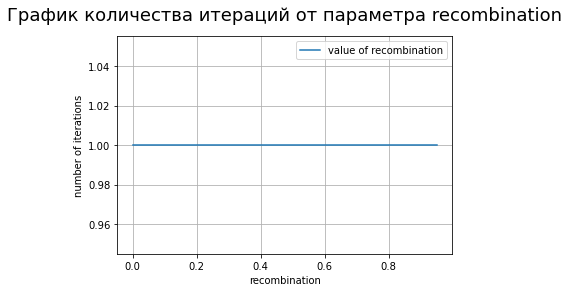

In [11]:
list_count_nit = []
recombination = [x for x in np.arange(0., 1., 0.05)]

for n in np.arange(0., 1., 0.05):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin', 
                                      popsize=10, tol=0.4, mutation=(0.5, 1), recombination=n, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)

plt.title('График количества итераций от параметра recombination', fontdict={'fontsize':18}, pad=16) 
plt.plot(recombination, list_count_nit, label = 'value of recombination' )
plt.grid(True)
plt.xlabel("recombination")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

In [ ]:
pip install optuna

## Дополнительное задание
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.
   

Поиск параметров путем использования фаремворка Optuna

In [14]:
%%time
def objective(trial):
    params = {'strategy': trial.suggest_categorical('strategy', ['best1bin', 'best1exp', 'randtobest1bin', 'rand2bin', 'rand1bin']),
             'popsize': trial.suggest_int('popsize', 11, 19),
             'mutation': trial.suggest_uniform('mutation', 0, 0.75),
              'recombination': trial.suggest_uniform('recombination', 0.75, 1), 
             }
    res = differential_evolution(ackley, bounds, **params, seed = 42)
    loss = res.nit + res.fun * 1e10  + np.abs(res.x.sum()) * 1e10
    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 100);
trial = study.best_trial
print(f'Accuracy: {trial.value}')
print(f'Best hyperparameters: {trial.params}')

[I 2021-07-01 23:58:19,722] A new study created in memory with name: no-name-ff7ee25a-0639-4dd7-8581-a727c8927548
[I 2021-07-01 23:58:19,916] Trial 0 finished with value: 65.0000044408921 and parameters: {'strategy': 'randtobest1bin', 'popsize': 11, 'mutation': 0.43689555947706327, 'recombination': 0.9982985206228453}. Best is trial 0 with value: 65.0000044408921.
[I 2021-07-01 23:58:19,990] Trial 1 finished with value: 262.4644297550277 and parameters: {'strategy': 'randtobest1bin', 'popsize': 11, 'mutation': 0.08218351517145989, 'recombination': 0.8428277433894629}. Best is trial 0 with value: 65.0000044408921.
[I 2021-07-01 23:58:20,076] Trial 2 finished with value: 220.4058553470272 and parameters: {'strategy': 'randtobest1bin', 'popsize': 13, 'mutation': 0.12775005852241225, 'recombination': 0.8898012755206478}. Best is trial 0 with value: 65.0000044408921.
[I 2021-07-01 23:58:20,352] Trial 3 finished with value: 75.0000044408921 and parameters: {'strategy': 'randtobest1bin', 'pop

[I 2021-07-01 23:58:26,193] Trial 31 finished with value: 27.00011990408666 and parameters: {'strategy': 'best1bin', 'popsize': 17, 'mutation': 0.27569568541552597, 'recombination': 0.9145471323202784}. Best is trial 19 with value: 23.0000044408921.
[I 2021-07-01 23:58:26,294] Trial 32 finished with value: 19.0000044408921 and parameters: {'strategy': 'best1bin', 'popsize': 19, 'mutation': 0.15155638108520786, 'recombination': 0.9467728344397345}. Best is trial 32 with value: 19.0000044408921.
[I 2021-07-01 23:58:26,579] Trial 33 finished with value: 64.74985376083714 and parameters: {'strategy': 'randtobest1bin', 'popsize': 19, 'mutation': 0.13597105521049996, 'recombination': 0.7935777750933463}. Best is trial 32 with value: 19.0000044408921.
[I 2021-07-01 23:58:26,614] Trial 34 finished with value: 35320939712.04733 and parameters: {'strategy': 'best1bin', 'popsize': 18, 'mutation': 0.0545224146450044, 'recombination': 0.8467978652753698}. Best is trial 32 with value: 19.00000444089

[I 2021-07-01 23:58:29,991] Trial 63 finished with value: 35320948352.19416 and parameters: {'strategy': 'best1bin', 'popsize': 18, 'mutation': 0.08672005097253606, 'recombination': 0.9774025454689385}. Best is trial 62 with value: 14.535229638387591.
[I 2021-07-01 23:58:30,081] Trial 64 finished with value: 15.000004440892099 and parameters: {'strategy': 'best1bin', 'popsize': 18, 'mutation': 0.11592983392222071, 'recombination': 0.988213452525044}. Best is trial 62 with value: 14.535229638387591.
[I 2021-07-01 23:58:30,103] Trial 65 finished with value: 35744519916.06373 and parameters: {'strategy': 'best1bin', 'popsize': 17, 'mutation': 0.03426106038565607, 'recombination': 0.9992937899474845}. Best is trial 62 with value: 14.535229638387591.
[I 2021-07-01 23:58:30,208] Trial 66 finished with value: 16.0000044408921 and parameters: {'strategy': 'best1bin', 'popsize': 18, 'mutation': 0.11201747576786583, 'recombination': 0.9597110723336871}. Best is trial 62 with value: 14.5352296383

[I 2021-07-01 23:58:32,556] Trial 94 finished with value: 15.000004440892099 and parameters: {'strategy': 'best1exp', 'popsize': 19, 'mutation': 0.07759334740360588, 'recombination': 0.970585031024662}. Best is trial 85 with value: 12.351614375977306.
[I 2021-07-01 23:58:32,695] Trial 95 finished with value: 15.000004440892099 and parameters: {'strategy': 'best1exp', 'popsize': 19, 'mutation': 0.07815274754775134, 'recombination': 0.967733678215623}. Best is trial 85 with value: 12.351614375977306.
[I 2021-07-01 23:58:32,769] Trial 96 finished with value: 94730908.18860456 and parameters: {'strategy': 'best1exp', 'popsize': 19, 'mutation': 0.016900930568941624, 'recombination': 0.9695436642203494}. Best is trial 85 with value: 12.351614375977306.
[I 2021-07-01 23:58:32,934] Trial 97 finished with value: 241.3600386707297 and parameters: {'strategy': 'best1exp', 'popsize': 19, 'mutation': 0.08080889094952481, 'recombination': 0.9548745603636027}. Best is trial 85 with value: 12.35161437

Accuracy: 12.351614375977306
Best hyperparameters: {'strategy': 'best1bin', 'popsize': 19, 'mutation': 0.06710348089406754, 'recombination': 0.9817987936928152}
Wall time: 13.5 s


### Контроль глобального оптимума


In [18]:
population_vs_iteration = {}
for i in range(1, 10, 1):
    result = differential_evolution(ackley, bounds, seed = 42, popsize = i)
    if (result.success == True) and (round(result.x.sum(), 3) == 0):
        population_vs_iteration[i] = result.nit
population_vs_iteration

{3: 29, 4: 39, 5: 100, 6: 99, 7: 87, 8: 97, 9: 101}

Можно улучшить работу через функцию, но сократив количество параметров, так как параметров очень много.

In [ ]:
# popsize = [x for x in range(1, 36)]\n",
# tol_list = [x for x in np.arange(0.0005, 1.0, 0.005)]\n",
# recombination = [x for x in np.arange(0., 1., 0.05)] \n",
updating_list = ['immediate', 'deferred']
strategy_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
                 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

In [ ]:
params = {}
nit = 100

for popsize in range(1, 36):
    for tol in np.arange(0.0005, 1.0, 0.005):
        for recombination in np.arange(0., 1., 0.05):
            for updating in updating_list:
                for strategy in strategy_list:
                    result_X = differential_evolution(ackley, bounds, strategy = strategy, popsize = popsize, 
                                                      tol = tol, mutation = (0.1, 1.9), recombination = recombination, seed = 42, updating = updating)
                    n = int(result_X.nit)
                    if n < nit:
                        nit = n
                        params['nit'] = n
                        params['popsize'] = popsize
                        params['tol'] = tol
                        params['recombination'] = recombination
                        params['updating'] = updating
                        params['strategy'] = strategy
                    else:
                        continue


# Вопросы:

1. Какие пути контроля глобалоного оптимума функции Ackley ?
   - как это осуществляется ? если можно пример или статью ?
2. Реализовать путем вложенных циклов доп. часть задания не удалось, буду благодарен за разбор этой части

Спасибо

Можно решить перебирая с помощью вложенных циклов, как сделано у тебя, только нужно осторожно с выбором шага значений для перебора (поменьше значений), чтобы не было очень много комбинаций; прикреплю более интересный пример с реализацией через фреймворк Optuna (правда он значительно сложнее как в реализации, так и для понимания).